# Auto Insurance Churn Analysis

Churn (attrition) is a significant issue for every company and presents itself in different forms for different parts of a business, from customer churn to employee churn.

Machine learning can help companies predict the likelihood of churn, as well as find insights and patterns that can help companies drive better decisions and strategies to minimize or decrease churn. The goal of this project is to develop a model to help predict customer churn.

Please note that the data is synthetic, and all customer information provided is fictitious. While the latitude-longitude information can be mapped at a high level and generally refers to the Dallas-Fort Worth Metroplex in North Texas, it is important to note that drilling down too far may result in some data points that are located in the middle of Jerry World, DFW Airport, or Lake Grapevine. The physical addresses provided are fake and are unrelated to the corresponding lat/long.

<h3>Context:</h3>
An auto insurance company operating primarily in the Dallas-Fort Worth Metroplex area is concerned about customer churn, which can significantly impact profitability and growth. Understanding the drivers behind customer attrition is essential for retaining valuable customers. As a newly hired Data Scientist on the Customer Analytics Team, you have been tasked with analyzing customer data to uncover patterns linked to churn and build predictive models. The goal is to help the company develop targeted retention strategies aimed at customers most likely to churn.
Note: The dataset used for this project is synthetic, and customer information is entirely fictitious.

<h3>Objective:</h3>

To identify the key factors influencing customer churn.

To develop a machine learning model that predicts the likelihood of a customer churning.

<h3>Dataset:</h3>
The dataset contains demographic, financial, and geographic information about individual customers, along with churn indicators.


   - **individual_id** - customer identifier

   - **address_id** - address identifier

   - **curr_ann_amt** - Current annual insurance amount (USD)

   - **days_tenure** - Number of days the customer has been with the company

   - **cust_orig_date** - Date when the customer first signed up

   - **age_in_years** - Customer's age

   - **date_of_birth** - Customer's date of birth

   - **latitude, longitude** - Geographic coordinates (approximate, located around DFW Metroplex)

   - **city, state, county** - Location details

   - **income** - Customer's annual income

   - **has_children** - Whether the customer has children (1 = Yes, 0 = No)

   - **length_of_residence** - Number of years at current residence

   - **marital_status** - Customer's marital status

   - **home_market_value** - Estimated market value of the customer's home

   - **home_owner** - Whether the customer owns their home (1 = Yes, 0 = No)

   - **college_degree** - Whether the customer has a college degree (1 = Yes, 0 = No)

   - **good_credit** - Whether the customer has a good credit rating (1 = Yes, 0 = No)

   - **acct_suspd_date** - Date the account was suspended (if applicable)

   - **Churn** - Churn flag (1 = Churned, 0 = Retained)


## Importing all required Libraries

In [ ]:
# Basic Libraries
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from io import StringIO
import matplotlib.pyplot as plt

# Classifiers
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, recall_score, accuracy_score, precision_score, f1_score

# For tuning the data/model
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Split into training and testing, cross-validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Decorator for visual loading bar (for loop)
from tqdm.auto import tqdm

In [ ]:
orig_url="https://drive.google.com/file/d/1zsQoewoElPYEeaz-sN5IGkKENqxXdM7p/view?usp=drive_link" # share link to data set

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text

csv_raw = StringIO(url)
df = pd.read_csv(csv_raw)
df.head()

,Unnamed: 0,individual_id,address_id,curr_ann_amt,days_tenure,cust_orig_date,age_in_years,date_of_birth,latitude,longitude,...,income,has_children,length_of_residence,marital_status,home_market_value,home_owner,college_degree,good_credit,acct_suspd_date,Churn
0,144735,2.213030e+11,5.213010e+11,1146.442431,5621,7/13/07,55,7/7/67,32.986990,-97.392171,...,125000.000,1,1.0,Married,50000 - 74999,1,0,1,NaN,0
1,195611,2.213020e+11,5.213010e+11,614.818952,1412,1/20/19,61,1/25/62,33.202155,-96.691054,...,250000.000,1,14.0,Married,150000 - 174999,1,0,1,NaN,0
2,197454,2.213030e+11,5.213010e+11,913.356647,2008,6/3/17,55,7/7/67,33.166228,-97.079344,...,57500.000,0,5.0,Married,125000 - 149999,1,1,1,NaN,0
3,143688,2.213020e+11,5.213010e+11,567.411230,1700,4/7/18,49,12/25/73,32.749850,-97.214792,...,80372.176,1,15.0,Married,50000 - 74999,0,0,1,NaN,0
4,306662,2.213000e+11,5.213000e+11,1134.050545,4815,9/26/09,51,1/24/72,32.848254,-96.639964,...,162500.000,0,15.0,Married,75000 - 99999,1,0,1,NaN,0


## Data information (data types, number of missing values, unique values for each variable)

In [ ]:
# Let's first have a look at the general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92849 entries, 0 to 92848
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           92849 non-null  int64  
 1   individual_id        92849 non-null  float64
 2   address_id           92849 non-null  float64
 3   curr_ann_amt         92849 non-null  float64
 4   days_tenure          92849 non-null  int64  
 5   cust_orig_date       92849 non-null  object 
 6   age_in_years         92849 non-null  int64  
 7   date_of_birth        92849 non-null  object 
 8   latitude             78826 non-null  float64
 9   longitude            78826 non-null  float64
 10  city                 92180 non-null  object 
 11  state                92849 non-null  object 
 12  county               92180 non-null  object 
 13  income               92849 non-null  float64
 14  has_children         92849 non-null  int64  
 15  length_of_residence  92849 non-null 

*italicized text*

*   The dataset contains 92,849 rows and 23 columns, with a mix of numerical, categorical, and date-based data
*   Dataset contains categorical values like city, county, home_market_value, etc. that need further investigation or conversion for meaningful analysis



In [ ]:
print(f'Number of missing values:\n\n{df.isnull().sum()}')

Number of missing values:

Unnamed: 0                 0
individual_id              0
address_id                 0
curr_ann_amt               0
days_tenure                0
cust_orig_date             0
age_in_years               0
date_of_birth              0
latitude               14023
longitude              14023
city                     669
state                      0
county                   669
income                     0
has_children               0
length_of_residence        0
marital_status             0
home_market_value       5060
home_owner                 0
college_degree             0
good_credit                0
acct_suspd_date        82170
Churn                      0
dtype: int64




*   Acct_suspd_date has a significant number of missing values, making it a weak candidate for analysis. It may be best to drop this column.
*   Latitude and longitutude are not well-suited for imputation using mean or median values, and they do not hold much relevance for our analysis. Removing these columns could be a practical choice.
*   City and County contain missing values but are categorical. Instead of dropping them, filling the gaps with a placeholder like "Unknown" would preserve data integrity while avoiding unnecessary loss of information.
*   home_market_value needs further analysis as it contains numerical information in an object format.





In [ ]:
print(f'Unique values:\n\n{df.nunique()}')

Unique values:

Unnamed: 0             92849
individual_id              4
address_id                 3
curr_ann_amt           92842
days_tenure             4955
cust_orig_date          4955
age_in_years              91
date_of_birth           1002
latitude               74823
longitude              75014
city                      95
state                      1
county                    14
income                    20
has_children               2
length_of_residence       17
marital_status             2
home_market_value         19
home_owner                 2
college_degree             2
good_credit                2
acct_suspd_date          300
Churn                      2
dtype: int64




*   The dataset has information for 95 cities, in 14 counties in Texas.
*   State has only 1 unique value. These column will not add any value to our model hence we can drop it.
*   There are several boolean type variables like good_credit, home_owner, college_degree, etc.
*   Age distribution is good, we can see people of 91 different ages represented in the dataset





## Data summaries (statistical summary of each variable)

In [ ]:
#Let's take a look at the statistical summary for each variable (count, mean, standard deviation and five number summary)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,92849.0,1.854227e+05,1.073373e+05,2.000000e+00,9.243300e+04,1.855470e+05,2.783540e+05,3.713890e+05
individual_id,92849.0,2.213018e+11,1.040044e+06,2.213000e+11,2.213010e+11,2.213020e+11,2.213030e+11,2.213030e+11
address_id,92849.0,5.213006e+11,5.130981e+05,5.213000e+11,5.213000e+11,5.213010e+11,5.213010e+11,5.213020e+11
curr_ann_amt,92849.0,9.397766e+02,2.459341e+02,-8.421321e+01,7.717065e+02,9.350108e+02,1.102139e+03,2.188444e+03
days_tenure,92849.0,3.599032e+03,2.339365e+03,2.000000e+01,1.399000e+03,3.647000e+03,6.291000e+03,6.291000e+03
age_in_years,92849.0,5.579741e+01,1.455443e+01,2.300000e+01,4.500000e+01,5.500000e+01,6.400000e+01,1.130000e+02
latitude,78826.0,3.285057e+01,1.945516e-01,3.202496e+01,3.271186e+01,3.284603e+01,3.298439e+01,3.352841e+01
longitude,78826.0,-9.694800e+01,2.965077e-01,-9.798978e+01,-9.716843e+01,-9.690443e+01,-9.672157e+01,-9.608419e+01
income,92849.0,8.151589e+04,5.438841e+04,5.000000e+03,4.750000e+04,7.000000e+04,8.750000e+04,2.500000e+05
has_children,92849.0,5.243460e-01,4.994096e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


### Observations from Data statistical summary

---



**Current Annual Amount**:
   - The mean annual amount is approximately 940, which seems to have some variation, as indicated by the standard deviation (around 245). The minimum value is negative (-84), suggesting potential data quality issues or that there are cases where amounts are being refunded or corrected. The maximum value is quite high (2188), showing that there is a significant range.

**Days tenure**
   - The average tenure is around 3600 days (~10 years), with a large spread (SD = 2339). A minimum value of just 20 days suggests the presence of new accounts, while the maximum value of 6291 days (around 17 years) indicates long-tenured accounts.

**Age in years**
   - The average age of individuals in the dataset is around 55.8 years, with a standard deviation of 14.5 years. The minimum age is 23, which could indicate younger individuals or possibly errors in the data, while the maximum age is 113 years, which may suggest outliers or data entry errors.

**Income**
   - The average income is around 81,515, with a wide spread (SD = 54,388). The minimum income is very low (5,000), which might indicate part-time workers or people in financial hardship. The maximum income (250,000) suggests some high-income individuals.

**Has Children**
   - The average value of 0.52 suggests that approximately 52% of the individuals have children, as this is a binary variable (0 = no, 1 = yes).

**Length of Residence**
   - The average length of residence is about 7.5 years, with a spread from 0 to 15 years. This suggests that many individuals are relatively settled, but there are also a fair number of individuals with less stability in terms of residence.

**Home Owner**
   - With an average of 0.82, it appears that most individuals (82%) in the dataset are homeowners, which could reflect financial stability or socio-economic class.

**College Degree**
   - About 35.4% of individuals have a college degree, indicating a fairly moderate level of higher education in the dataset.

**Good Credit**
   - A majority (84.2%) of individuals have good credit, which suggests that this dataset might be skewed toward financially responsible individuals.

## Handling missing values

In [ ]:
# Handling missing values for 'latitude' and 'longitude'

# Fill missing values by average of addresses in SAME city
city_avg_coords = df.groupby('city')[['latitude', 'longitude']].transform('mean')
# print(city_avg_coords.head(10))

# Fill missing latitude and longitude with the average for the corresponding city
print(f"Adding lat and long of locations based on average coords of their cities\n{df[['latitude','longitude']].isna().sum()}")
df[['latitude', 'longitude']] = df[['latitude', 'longitude']].fillna(city_avg_coords)

print(f"\nNumber of rows with average still not filled:\n{df[['latitude','longitude']].isna().sum()}\nDropping them\n")
df.dropna(subset=['latitude', "longitude"],inplace=True)
print("Missing values for coordinates cleaned.")

# print(f"Number of rows with average still not filled:\n{df[['latitude','longitude']].isna().sum()}.")

# Handling missing values for 'city' and 'county'  -- temp? We can try to get city, state using coords.
df['city'] = df['city'].fillna('Unknown_city')
df['county'] = df['county'].fillna('Unknown_county')

# Dropping na values(5060, <10% of 90k). Maybe we can reduce no. of categories?
print(f"\nDropping {df['home_market_value'].isna().sum()} empty values for home_market_value")
df.dropna(subset=['home_market_value'],inplace=True)

# Dropping the 'acct_suspd_date' column due to high percentage of missing values
# We can convert this col to categorical whether account is suspended or not.
df = df.drop(columns=['address_id', 'individual_id'])

Adding lat and long of locations based on average coords of their cities
latitude     14023
longitude    14023
dtype: int64

Number of rows with average still not filled:
latitude     99
longitude    99
dtype: int64
Dropping them

Missing values for coordinates cleaned.

Dropping 4969 empty values for home_market_value


**Steps:**

1. Handling missing values for 'latitude' and 'longitude' using 'city': Filled the missing values by taking average coordinates of corresponding city. Then dropped the records which have missing values for all 4 of latitude, longitude, city and country.

2. Handling missing values for 'city' and 'county': Filled with 'Unknown_city' and 'Unknown_county' respectively.

3. Handling missing values for 'home_market_value': It is hard to fill the values with other available data. Therefore, dropped the rows with missing values as the count is less than 10% of dataset.

4. Handling 'acct_suspd_date' column: Dropped due to a high percentage of missing values. But this column can be transformed into a categorical one (Future plan).

5. Handling 'address_id' and 'individual_id': Dropped because these do not provide any useful insights into the data.

In [ ]:
# Variable with all columns for use later.
# All = All variable names
# Cat = Categorical, divided into all, binary and multi valued.
# Num = Numerical, divided into all and data (no dates)
columns = {
    "all":[
           "individual_id","address_id","curr_ann_amt","days_tenure","cust_orig_date",
           "age_in_years","date_of_birth","latitude","longitude","city","state","county",
           "income","has_children","length_of_residence","marital_status","home_market_value",
           "home_owner","college_degree","good_credit","acct_suspd_date","Churn"
          ],
    "cat":{
        "all":[
            "individual_id","address_id","city","state","county","has_children",
            "marital_status","home_market_value","home_owner","college_degree","good_credit","Churn"
            ],
        "binary":["has_children","marital_status","home_owner","college_degree","good_credit","Churn"],
        "multi":[
                 #"city","state", => Only 1 state and too many cities to show in bar.
                 "county","home_market_value"
                 ]
    },
    "num":{
        "all":[
            "curr_ann_amt","days_tenure","cust_orig_date","age_in_years","date_of_birth",
            "latitude","longitude","income","length_of_residence","acct_suspd_date"
            ],
        "data":["curr_ann_amt","days_tenure","age_in_years","latitude","longitude","income","length_of_residence"],
    }
}

## Visualizing the quantitative variables

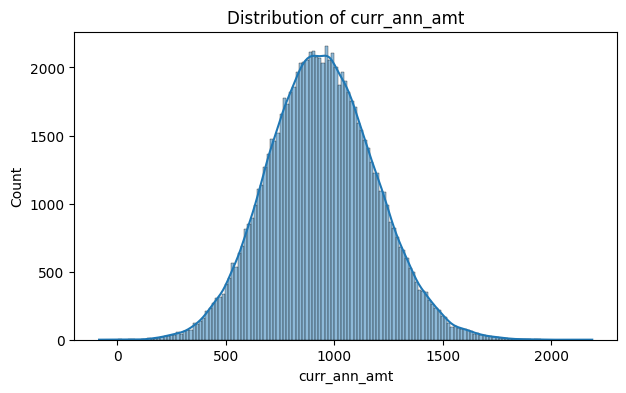

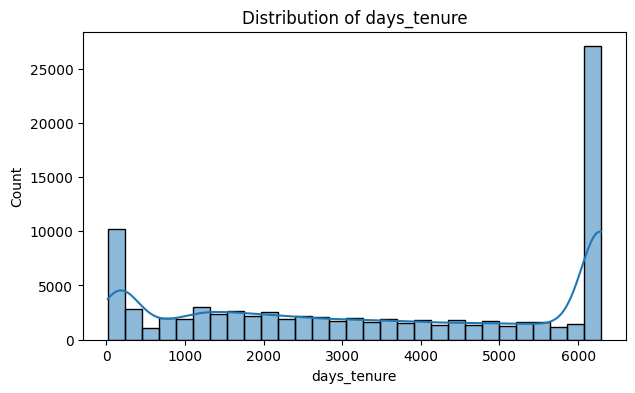

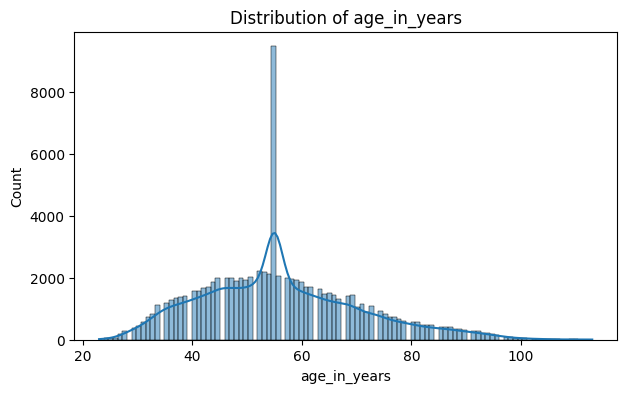

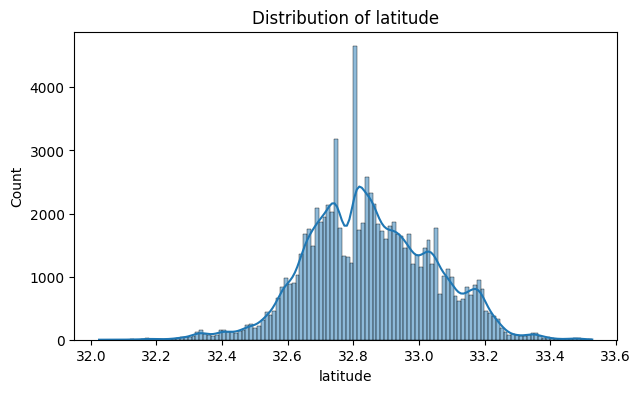

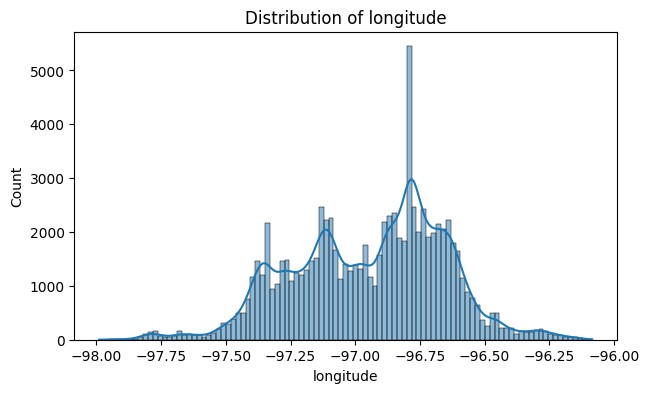

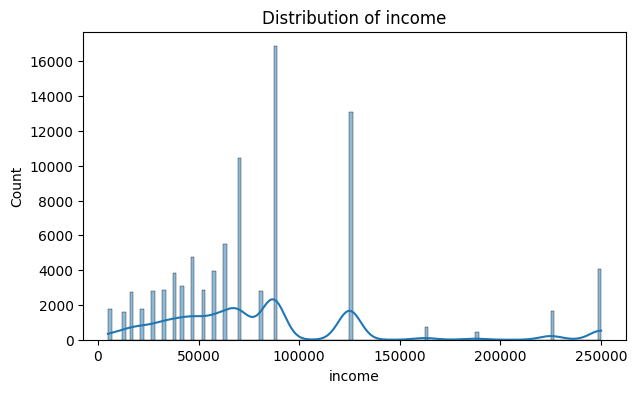

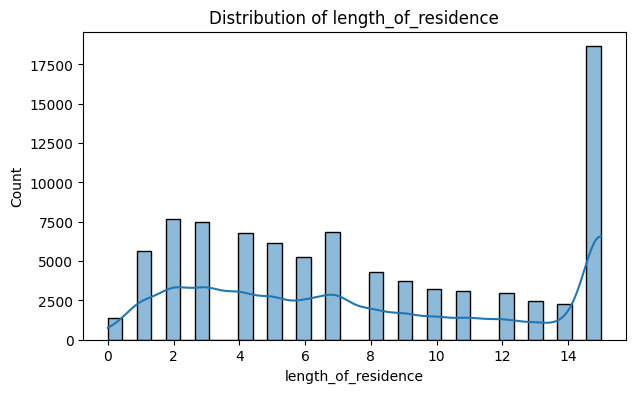

In [ ]:
# Loop through non-date numerical columns and plot histograms.

def plot_hist(cols_list):
  for col in cols_list:
      plt.figure(figsize=(7, 4))
      sns.histplot(data=df, x=col, kde=True)
      plt.title(f"Distribution of {col}")
      plt.show()
      print()

plot_hist(columns["num"]["data"])

### Observations from Histogram:
**Days Tenure Distribution**
   - The histogram shows the distribution of customer tenure in days.
There is a peak at the lower and higher end of the tenure range, indicating that a significant number of customers have a relatively short tenure or a very long tenure with the insurance company.


**Age Distribution**
   - The age distribution of customers is relatively spread out, but there is a noticeable peak in the middle age range (around 50-55 years). There are fewer customers at the extremes of the age range (very young and very old), which is typical for many insurance customer bases.

**Income Distribution**
   - The income distribution shows that most customers have incomes in the lower to middle range. There is a sharp decline in the number of customers as income increases beyond $100,000, indicating that higher-income individuals are less likely to leave.

**Length of Residence Distribution**
   - The distribution of the length of residence shows that most customers have lived at their current residence for a shorter period (0 to 6 years). The number of customers decreases as the length of residence increases, with very few customers having lived at their residence for more than 10 years. This could imply that customers who have recently moved might be more likely to churn, possibly due to changes in their life circumstances.

**Current Annual Amount Distribution**
   - The distribution of the current annual amount shows that most customers have a average annual amount (around $1000). There is a decline in the number of customers as the annual amount increases or decreases from 1000, indicating that higher or lower annual amounts are less common. This suggests a relatively uniform spending pattern among customers, so churn might not be strongly tied to spending amounts.

**Latitude and Longitude**
  - These geographic coordinates help identify the location of customer's homes. No major insights can be gathered without further geographic analysis.


## Exploring/Visualizing categorical variables

In [ ]:
# Reusable functions to plot bar/pie charts anywhere

def plot_bar(cols_list):
# Bar chart for multi values. Loop through the columns.
  for i in cols_list:
      # Sorting values to plot chart by descending order
      sorted_counts = df[i].value_counts().sort_values(ascending=False)
      print(sorted_counts)
      plt.figure(figsize=(6,3))
      ax = sns.countplot(data=df, y=i, order=sorted_counts.index)

      # Add padding so datalabels dont go out of bounds
      ax.set_xlim(0, df[i].value_counts().max() * 1.2)

      # For writing the datalabels correctly.
      for p in ax.patches:
        width = p.get_width()
        plt.text(width+1, p.get_y() + p.get_height()/2,
                '{:1.0f}'.format(width),
                ha='left', va='center')
      plt.title(f'Bar Chart of {i}')
      plt.show()
      print()

# Pie chart for binary values. Loop through the columns.
def plot_pie(cols_list):
  for i in cols_list:
      plt.figure(figsize=(4,4))
      counts = df[i].value_counts()
      print(counts)
      counts.plot.pie(autopct='%1.1f%%', startangle=90)
      plt.title(f'Pie Chart of {i}')
      plt.show()
      print()

county
Dallas            32678
Tarrant           25407
Collin            11310
Denton             9703
Ellis              2379
Kaufman            1702
Parker             1288
Johnson            1280
Rockwall           1241
Unknown_county      568
Cooke                92
Hunt                 90
Navarro              25
Grayson              17
Hill                  1
Name: count, dtype: int64


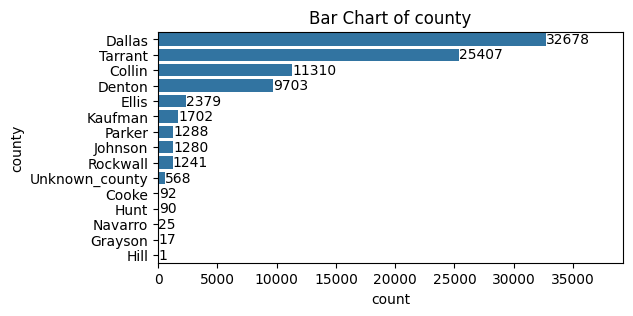


home_market_value
75000 - 99999      16989
100000 - 124999    15392
50000 - 74999      12207
125000 - 149999    11748
150000 - 174999     8180
175000 - 199999     5262
25000 - 49999       4769
200000 - 224999     3695
225000 - 249999     2514
250000 - 274999     1640
1000 - 24999        1414
300000 - 349999     1042
275000 - 299999      987
350000 - 399999      589
500000 - 749999      504
400000 - 449999      319
450000 - 499999      249
750000 - 999999      169
1000000 Plus         112
Name: count, dtype: int64


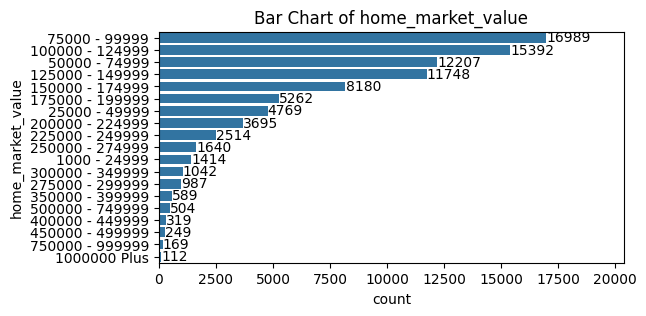


has_children
1    45992
0    41789
Name: count, dtype: int64


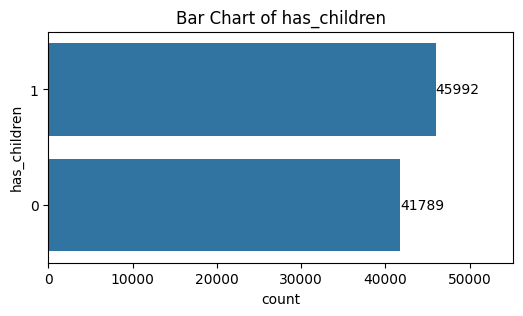


marital_status
Married    55062
Single     32719
Name: count, dtype: int64


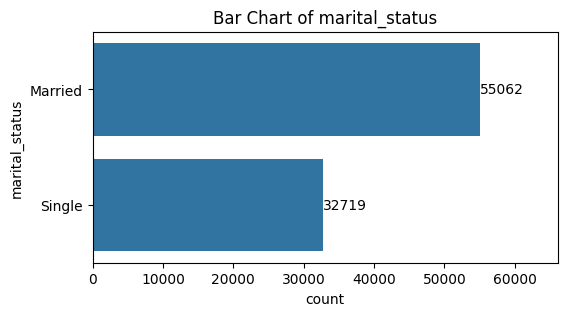


home_owner
1    75701
0    12080
Name: count, dtype: int64


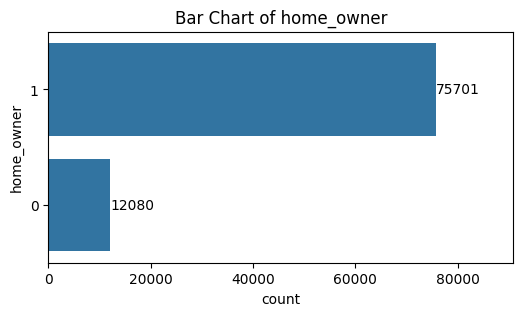


college_degree
0    56512
1    31269
Name: count, dtype: int64


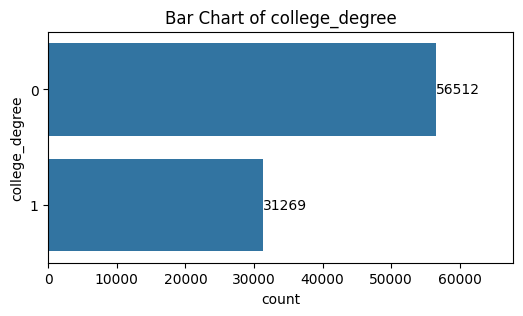


good_credit
1    74250
0    13531
Name: count, dtype: int64


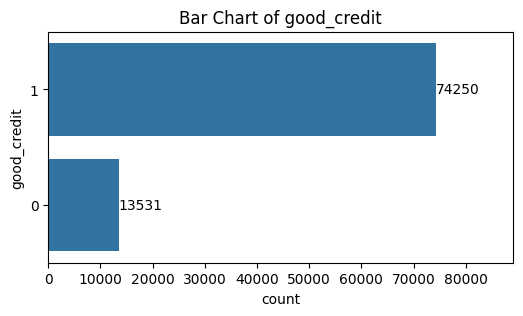


Churn
0    77732
1    10049
Name: count, dtype: int64


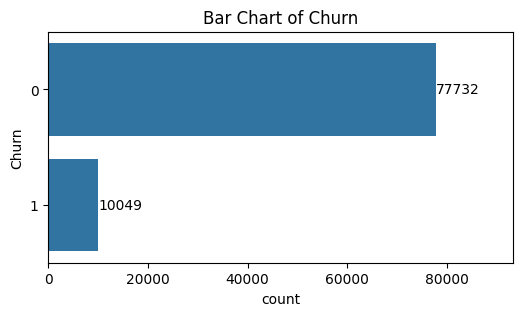

In [ ]:
# Plotting categorical variables as bar charts

plot_bar(columns["cat"]["multi"])
# plot_pie(columns["cat"]["binary"]) #Pie chart removed
plot_bar(columns["cat"]["binary"])

**Interpretations:**

*   Dallas county has the highest number of customers, at 32,678 (around 37%).
*   Customer churn rate is about 11.4%.
*   52.4% of the customers have children.
*   62.7% of the customers are married.
*   86.2% of the customers have their own homes.
*   35.6% of the customers have college degree.
*   84.6% of the customers have a good credit score.








In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87781 entries, 0 to 92848
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           87781 non-null  int64  
 1   curr_ann_amt         87781 non-null  float64
 2   days_tenure          87781 non-null  int64  
 3   cust_orig_date       87781 non-null  object 
 4   age_in_years         87781 non-null  int64  
 5   date_of_birth        87781 non-null  object 
 6   latitude             87781 non-null  float64
 7   longitude            87781 non-null  float64
 8   city                 87781 non-null  object 
 9   state                87781 non-null  object 
 10  county               87781 non-null  object 
 11  income               87781 non-null  float64
 12  has_children         87781 non-null  int64  
 13  length_of_residence  87781 non-null  float64
 14  marital_status       87781 non-null  object 
 15  home_market_value    87781 non-null  obje

## Examine the correlation matrix for the predictor variables

<Axes: >

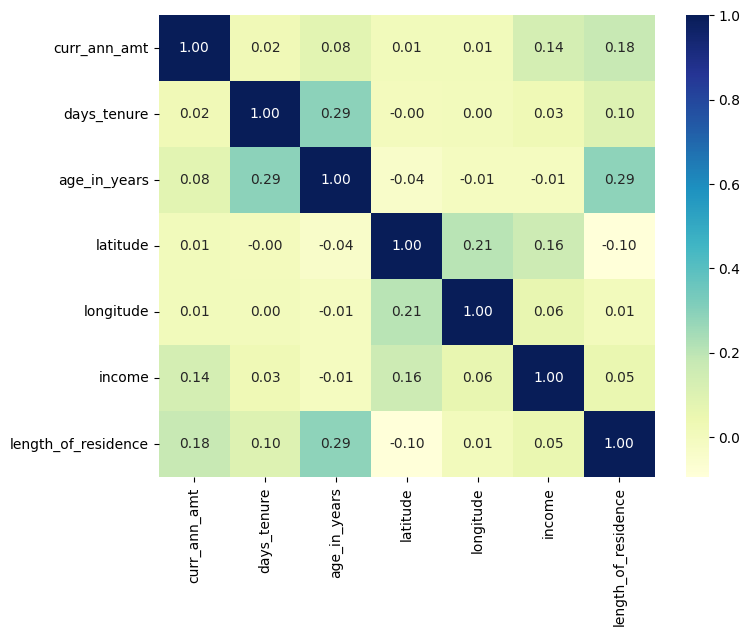

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[columns["num"]["data"]].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

### Observations


*   There does not seem to be any correlation between the independent variables.
*   The highest correlation factor is for **age_in_years** with **days_tenure** and **length_of_residence**, but even that is only 0.29, which means there is a weak correlation.


**Scatter plot to visualize relationship between age_in_years and days_tenure.**

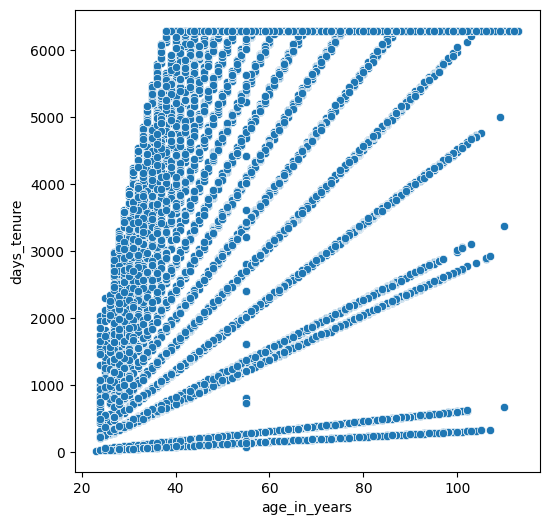

In [ ]:
# Scatter plot between age_in_years and days_tenure.

plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='age_in_years', y='days_tenure')
plt.show()

# As we can see, the scatter plot aligns with the observation that there is
# a weak correlation between the two variables

## Data Pre-processing

Let's complete the final preparations of our data to be used for classification models.

## Feature Engineering

0    189
1     51
2     70
3     60
4    163
Name: cust_orig_months, dtype: int64


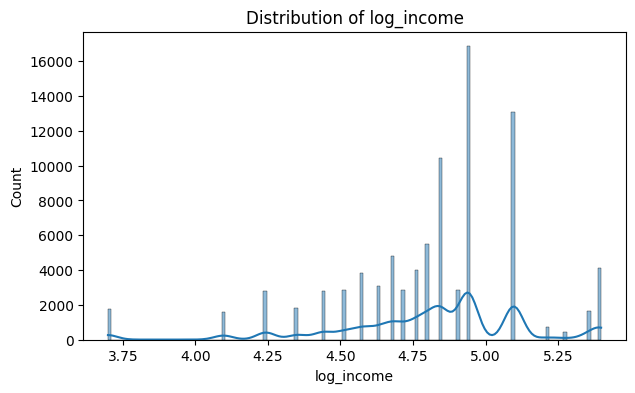


home_market_value
50000 - 99999      29196
100000 - 149999    27140
150000 - 199999    13442
200000 - 249999     6209
0 - 49999           6183
250k+               5611
Name: count, dtype: int64


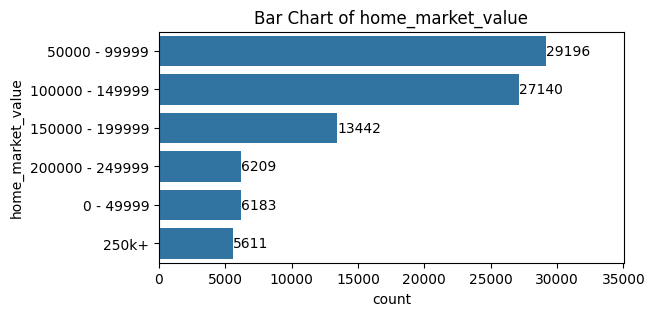


county
Dallas     32678
Tarrant    25407
Collin     11310
Denton      9703
Other       8683
Name: count, dtype: int64


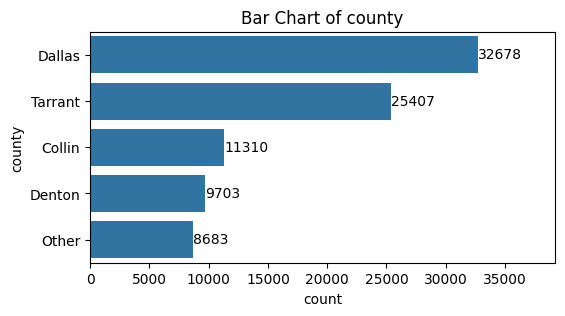


acct_suspd
0    77732
1    10049
Name: count, dtype: int64


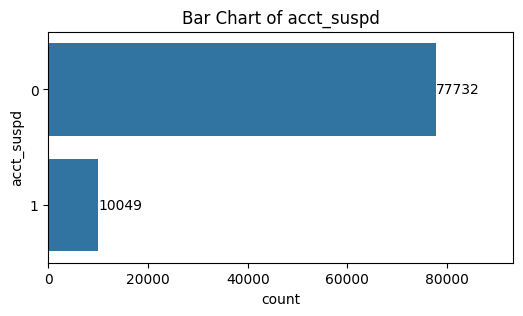

In [ ]:
# 1. Log transform income
df["log_income"] = np.log10(df["income"])
# print(df["log_income"].head())

# 2. County category (5 total)
top_counties = df['county'].value_counts().nlargest(4).index
# print("Top counties:", top_counties)
df["county"] = df["county"].where(df['county'].isin(top_counties), 'Other')

# 3. Home market value category (6 total)
def categorize_hmv(hmv):
    if "Plus" in hmv:
        upper = float('inf')  # '1000000 Plus' treated as infinity
    else:
        upper = int(hmv.split(" - ")[1])  # Get the upper limit

    # Assign categories based on the upper limit
    if upper < 50000:
        return "0 - 49999"
    elif upper < 100000:
        return "50000 - 99999"
    elif upper < 150000:
        return "100000 - 149999"
    elif upper < 200000:
        return "150000 - 199999"
    elif upper < 250000:
        return "200000 - 249999"
    else:
        return "250k+"

# Apply categorization
# print(df['home_market_value'].head())
df['home_market_value'] = df['home_market_value'].apply(categorize_hmv)

# print(df['home_market_value'].head())

# 4. Account suspended category (Binary 1 or 0)
df['acct_suspd'] = np.where(df['acct_suspd_date'].notna(), 1, 0)
# print(df["acct_suspd"].head())

# 5. Get number of months from cust_orig_date, with snapshot date being Apr 30, 2023
dates = pd.to_datetime(df["cust_orig_date"], format='%m/%d/%y')

# Define the snapshot date (April 30, 2023)
data_snapshot_date = pd.to_datetime('2023-04-30')

# Function to calculate the difference in months
def months_difference(date, snapshot_date):
    # Calculate the year difference in months
    year_diff = snapshot_date.year - date.year
    month_diff = snapshot_date.month - date.month

    # Calculate total months
    total_months = year_diff * 12 + month_diff
    if snapshot_date.day < date.day:
        total_months -= 1

    return total_months

# Apply the function to calculate months difference for each date
df["cust_orig_months"] = dates.apply(months_difference, snapshot_date=data_snapshot_date)

# Print the results
print(df["cust_orig_months"].head())

plot_hist(["log_income"])
plot_bar(["home_market_value", "county"])
# plot_pie(["acct_suspd"]) #Pie removed
plot_bar(["acct_suspd"])

### Steps taken:

1. Applied a log transformation to the income variable to reduce right skewness and normalize the distribution.
   - Customer income has some very high values that can confuse models. Taking the log of income makes patterns clearer and helps models work better.

2. Retained the top 4 most frequent counties as separate categories; grouped all others into a single category called "Other".
   - Some counties had very few customers. Focusing on the top counties gives better insights and helps plan marketing and operations better.

3. Binned home market values into consistent ranges (like "0-49999", "50000-99999", etc.) up to $250,000, with all higher values grouped into a single "250000+" category.
   - Home value shows customer wealth. Grouping it into clear levels helps with better marketing, product offers, and risk checks.


4. Created a new column, "acct_suspd" (from acct_suspd_date column) to indicate whether the account was ever suspended, with values of 1 for "Yes" and 0 for "No."
   - Suspended accounts show customer issues. Flagging them helps with early support, retention, and risk checks.
5. Created a new column, cust_orig_months (from cust_orig_date column), by calculating the number of months from the cust_orig_date to April 30th, 2023, which represents the date of the data snapshot.
   - Tenure shows how loyal and engaged customers are. It helps with churn prediction, retention plans, and loyalty programs.

## Creation of Dummy variables

In [ ]:
# Creating dummies for Categorical variables
df = pd.get_dummies(df, columns=['home_market_value','marital_status',
                                              'county'], prefix=['hmv','marital',
                                                                 'county'])

print(df)
df.info()


       Unnamed: 0  curr_ann_amt  days_tenure cust_orig_date  age_in_years  \
0          144735   1146.442431         5621        7/13/07            55   
1          195611    614.818952         1412        1/20/19            61   
2          197454    913.356647         2008         6/3/17            55   
3          143688    567.411230         1700         4/7/18            49   
4          306662   1134.050545         4815        9/26/09            51   
...           ...           ...          ...            ...           ...   
92843      193669    778.729621          264        3/13/22            90   
92844        2812    938.630756         3427        7/15/13            55   
92845      209614    993.835096          195        5/21/22            71   
92847      192268    858.254026         1853        11/5/17            74   
92848       21173    872.677961         6291        9/11/05            92   

      date_of_birth   latitude  longitude         city state  ...  \
0     

In [ ]:
# Adding newly created or modified to original columns variable
# new_vars = ["acct_suspd", "hmv_0 - 49999", "hmv_100000 - 149999", "log_income",
#             "hmv_150000 - 199999", "hmv_200000 - 249999", "hmv_250k+", "hmv_50000 - 99999", "marital_Married",
#             "marital_Single", "county_Collin","county_Dallas", "county_Denton", "county_Other", "county_Tarrant"]

new_vars = ["cust_orig_months", "log_income","acct_suspd","hmv_0 - 49999","hmv_50000 - 99999",
            "hmv_100000 - 149999", "hmv_150000 - 199999","hmv_200000 - 249999","hmv_250k+","marital_Married","marital_Single",
 "county_Collin","county_Dallas","county_Denton","county_Other","county_Tarrant", "Churn"]

columns["num"]["new_data"] = columns["num"]["data"]
columns["num"]["new_data"].extend(new_vars)

## Boxplots of Predictors with Churn

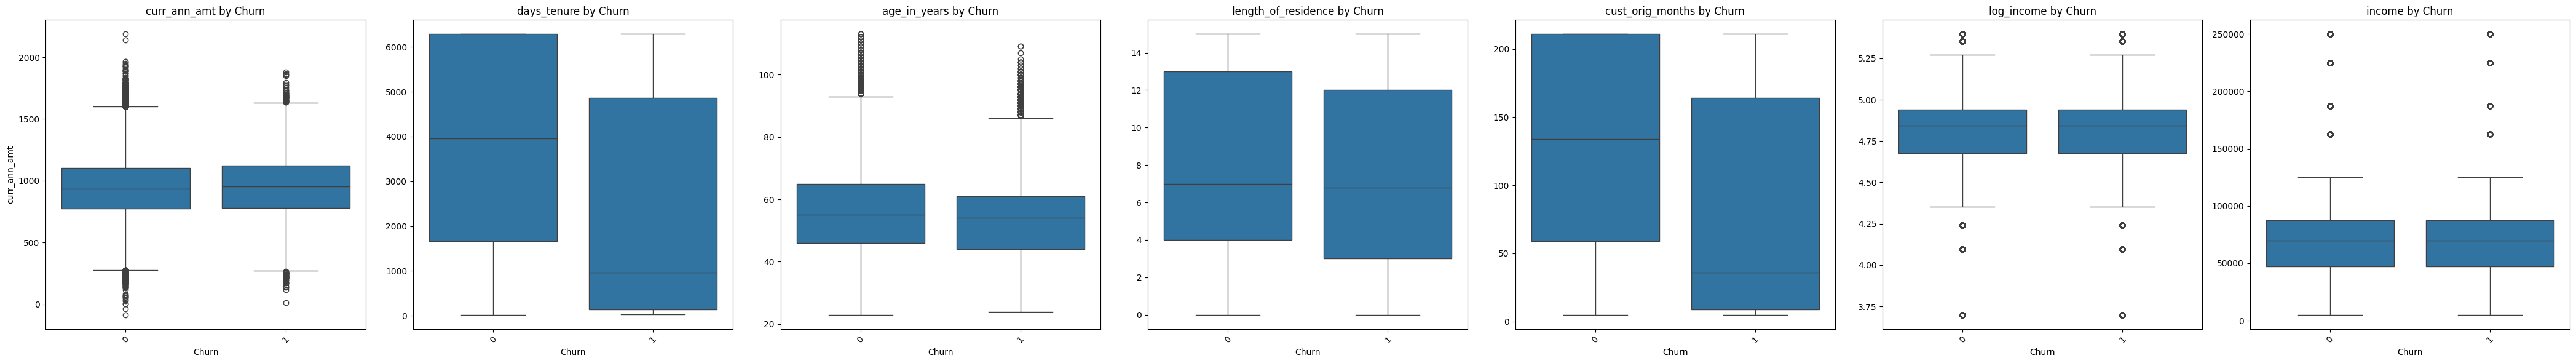

In [ ]:
boxplots_list = ['curr_ann_amt', 'days_tenure', 'age_in_years', 'length_of_residence', 'cust_orig_months', 'log_income', 'income']

n_cols = len(boxplots_list)
fig, axes = plt.subplots(1, n_cols, figsize=(6 * n_cols, 6))

if n_cols == 1:
    axes = [axes]

# Plot boxplots
for i, col in enumerate(boxplots_list):
    sns.boxplot(x='Churn', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} by Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(col if i == 0 else '')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Observations:**
*   Boxplots of cust_orig_months and days_tenure reveal that customers with longer tenure are less likely to churn. Specifically, the median tenure for customers who churned is around 40 months, whereas it is approximately 135 months for those who remained. This suggests that tenure plays a significant role in predicting customer loyalty. To improve retention, strategies can be tailored to newer customers, focusing on preventing churn through targeted loyalty programs, personalized engagement, and incentives designed to foster long-term commitment.
*   The boxplots for income, length of residence, age in years, and current annual amount show little to no significant difference between customers who churned and those who did not. These features do not seem to have a strong impact on customer churn. Resources could be better allocated to other factors that show impact rather than focusing on these features in churn prevention models.

## Correlation Matrix

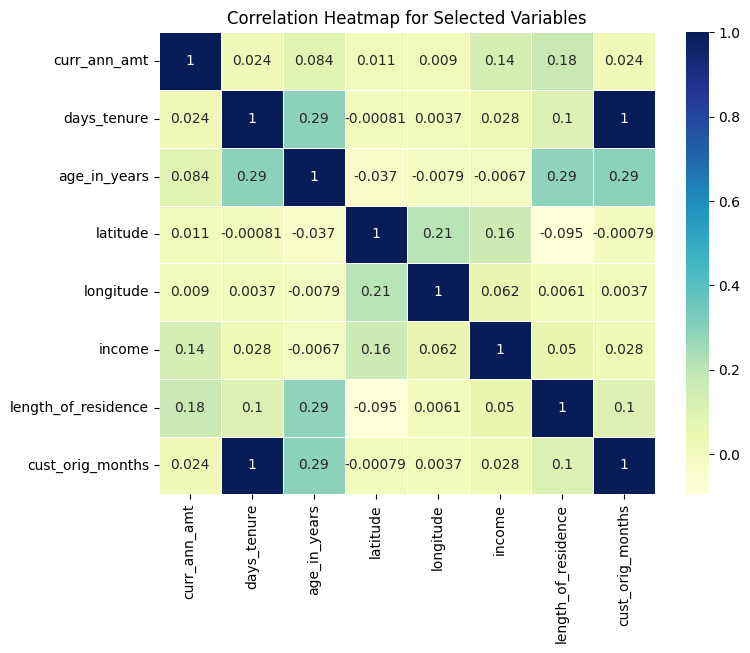

In [ ]:
df_corr = df[["curr_ann_amt", "days_tenure", "age_in_years", "latitude", "longitude", "income", "length_of_residence", "cust_orig_months"]].corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_corr, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title("Correlation Heatmap for Selected Variables")
plt.show()

### Observations


   * There does not seem to be any correlation between the independent variables.
   * There is a strong relationship between cust_orig_months (customer origin months) and days_tenure (length of customer tenure). To reduce redundancy and potential multicollinearity, we will remove the cust_orig_months column.
The strong correlation between feature variables introduces multicollinearity, which can distort the analysis of the target variable (churn).


## Dropping Variables

We are removing the following columns from our DataFrame for the reasons outlined below:

* **city**: Contains similar information to the 'State' column and has too many unique city values, making it less useful for analysis.

* **state**: No unique value in it. can be dropped as it makes less useful for analysis.

* **date_of_birth**: Redundant, as we already have the 'age_in_years' column, which provides the necessary information.

* **acct_suspd_date**: No longer needed, as we've created dummy variables from it, which already capture the relevant information.

* **Unnamed:0**: Does not add practical value to our analysis and can be removed.

* **cust_orig_date**: This column has been transformed into the 'cust_orig_months' variable, which represents the number of months with the company.

* **cust_orig_months**: Since this variable is strongly correlated with 'days_tenure,' it will be removed to reduce redundancy and avoid multicollinearity.

* **income**: We created the 'log_income' variable to reduce skewness and provide a more normally distributed representation.

* **hmv_250k+ and county_Other**: These are baseline variables, and removing them is necessary to avoid multicollinearity in regression models.










In [ ]:
df.drop(['city', 'state', 'acct_suspd', 'date_of_birth', 'acct_suspd_date', 'Unnamed: 0', 'cust_orig_date', 'income', 'hmv_250k+', 'marital_Single', 'cust_orig_months', 'county_Other', 'longitude', 'latitude'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87781 entries, 0 to 92848
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   curr_ann_amt         87781 non-null  float64
 1   days_tenure          87781 non-null  int64  
 2   age_in_years         87781 non-null  int64  
 3   has_children         87781 non-null  int64  
 4   length_of_residence  87781 non-null  float64
 5   home_owner           87781 non-null  int64  
 6   college_degree       87781 non-null  int64  
 7   good_credit          87781 non-null  int64  
 8   Churn                87781 non-null  int64  
 9   log_income           87781 non-null  float64
 10  hmv_0 - 49999        87781 non-null  bool   
 11  hmv_100000 - 149999  87781 non-null  bool   
 12  hmv_150000 - 199999  87781 non-null  bool   
 13  hmv_200000 - 249999  87781 non-null  bool   
 14  hmv_50000 - 99999    87781 non-null  bool   
 15  marital_Married      87781 non-null  bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87781 entries, 0 to 92848
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   curr_ann_amt         87781 non-null  float64
 1   days_tenure          87781 non-null  int64  
 2   age_in_years         87781 non-null  int64  
 3   has_children         87781 non-null  int64  
 4   length_of_residence  87781 non-null  float64
 5   home_owner           87781 non-null  int64  
 6   college_degree       87781 non-null  int64  
 7   good_credit          87781 non-null  int64  
 8   Churn                87781 non-null  int64  
 9   log_income           87781 non-null  float64
 10  hmv_0 - 49999        87781 non-null  bool   
 11  hmv_100000 - 149999  87781 non-null  bool   
 12  hmv_150000 - 199999  87781 non-null  bool   
 13  hmv_200000 - 249999  87781 non-null  bool   
 14  hmv_50000 - 99999    87781 non-null  bool   
 15  marital_Married      87781 non-null  bool

## Training and Testing data split

In [ ]:
# Separating the target variable and others
y = df['Churn']

X= df.drop(columns = ['Churn'])

X.info()

#Scaling the data
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)

# X is the feature data and y is the target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


<class 'pandas.core.frame.DataFrame'>
Index: 87781 entries, 0 to 92848
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   curr_ann_amt         87781 non-null  float64
 1   days_tenure          87781 non-null  int64  
 2   age_in_years         87781 non-null  int64  
 3   has_children         87781 non-null  int64  
 4   length_of_residence  87781 non-null  float64
 5   home_owner           87781 non-null  int64  
 6   college_degree       87781 non-null  int64  
 7   good_credit          87781 non-null  int64  
 8   log_income           87781 non-null  float64
 9   hmv_0 - 49999        87781 non-null  bool   
 10  hmv_100000 - 149999  87781 non-null  bool   
 11  hmv_150000 - 199999  87781 non-null  bool   
 12  hmv_200000 - 249999  87781 non-null  bool   
 13  hmv_50000 - 99999    87781 non-null  bool   
 14  marital_Married      87781 non-null  bool   
 15  county_Collin        87781 non-null  bool

In this step, we prepared the dataset for training by:

- Separating the dependent variable (y) and the independent variables (X).

- Splitting the dataset into training (80%) and testing (20%) subsets to evaluate our model's performance effectively.

## Metrics score evaluation function

In [ ]:
# Creating metric score function

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## Decision Tree

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     62185
           1       0.51      0.19      0.28      8039

    accuracy                           0.89     70224
   macro avg       0.71      0.58      0.61     70224
weighted avg       0.86      0.89      0.86     70224



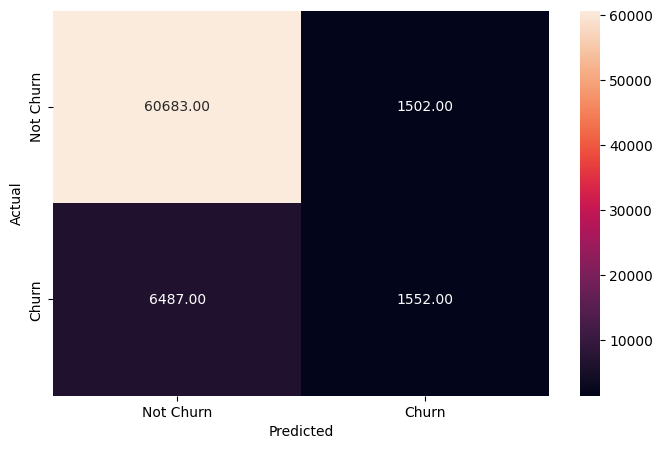

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     15547
           1       0.52      0.21      0.30      2010

    accuracy                           0.89     17557
   macro avg       0.71      0.59      0.62     17557
weighted avg       0.86      0.89      0.87     17557



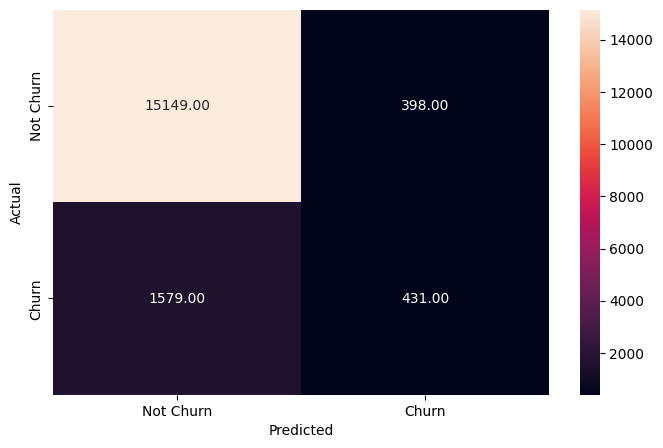

In [ ]:
# Building decision tree
dt = DecisionTreeClassifier(random_state=1, max_depth=8, min_samples_leaf=3000)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Checking model performace of dt on training data
y_train_pred_dt=dt.predict(X_train)
metrics_score(y_train,y_train_pred_dt)

# Checking model performace of dt on testing data
y_pred_test_dt = dt.predict(X_test)
metrics_score(y_test, y_pred_test_dt)

**Observations:**
   - Accuracy was 89%, mainly driven by strong performance on non-churners.
   - Churn customer detection was weak, with 52% precision(only half of predicted churned customers are correct), 21% recall(correctly identifies just 21% of actual churned customers), and 30% f1-score.
   - High recall (97%) for non-churners, but churners were largely missed.
   - The model needs improvement in identifying churned customers.



### Resampling Data with SMOTE

Applying SMOTE to address class imbalance

In [ ]:
#### SMOTE method to address class imbalance

# Applying SMOTE only to the training data
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the shapes before and after SMOTE
print("Original training set shape:", X_train.shape, y_train.shape)
print("Resampled training set shape:", X_train_resampled.shape, y_train_resampled.shape)
print("Test set shape (unchanged):", X_test.shape, y_test.shape)

Original training set shape: (70224, 19) (70224,)
Resampled training set shape: (124370, 19) (124370,)
Test set shape (unchanged): (17557, 19) (17557,)


              precision    recall  f1-score   support

           0       0.93      0.87      0.90     15547
           1       0.32      0.47      0.38      2010

    accuracy                           0.82     17557
   macro avg       0.62      0.67      0.64     17557
weighted avg       0.86      0.82      0.84     17557



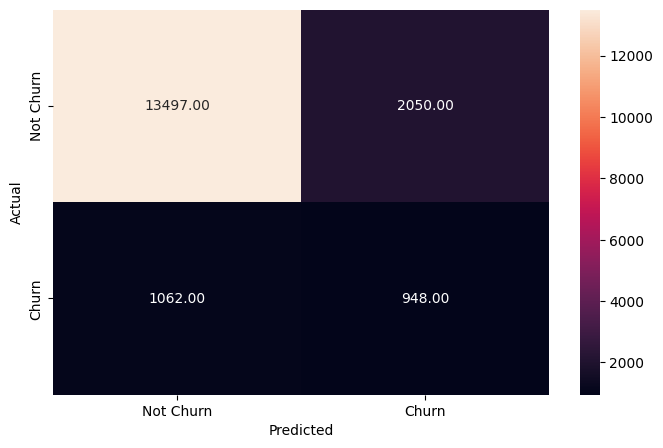

In [ ]:
dt.fit(X_train_resampled, y_train_resampled)
y_pred = dt.predict(X_test)
y_pred[:6]

# Checking model performace of dt on testing data with SMOTE
y_pred_test_dt_smote = dt.predict(X_test)
metrics_score(y_test, y_pred_test_dt_smote)

**Observations:**
- Accuracy dropped slightly to 82%, but model became more balanced across classes.
- Churn customer recall improved significantly to 47%, showing better sensitivity.
- Precision for churners dropped to 32%, but f1-score improved to 38%, meaning better churn prediction overall.
- Model now catches more churners but with some trade-off on overall accuracy — a good move for churn-sensitive use cases.

###Decision tree diagram with SMOTE resampled data

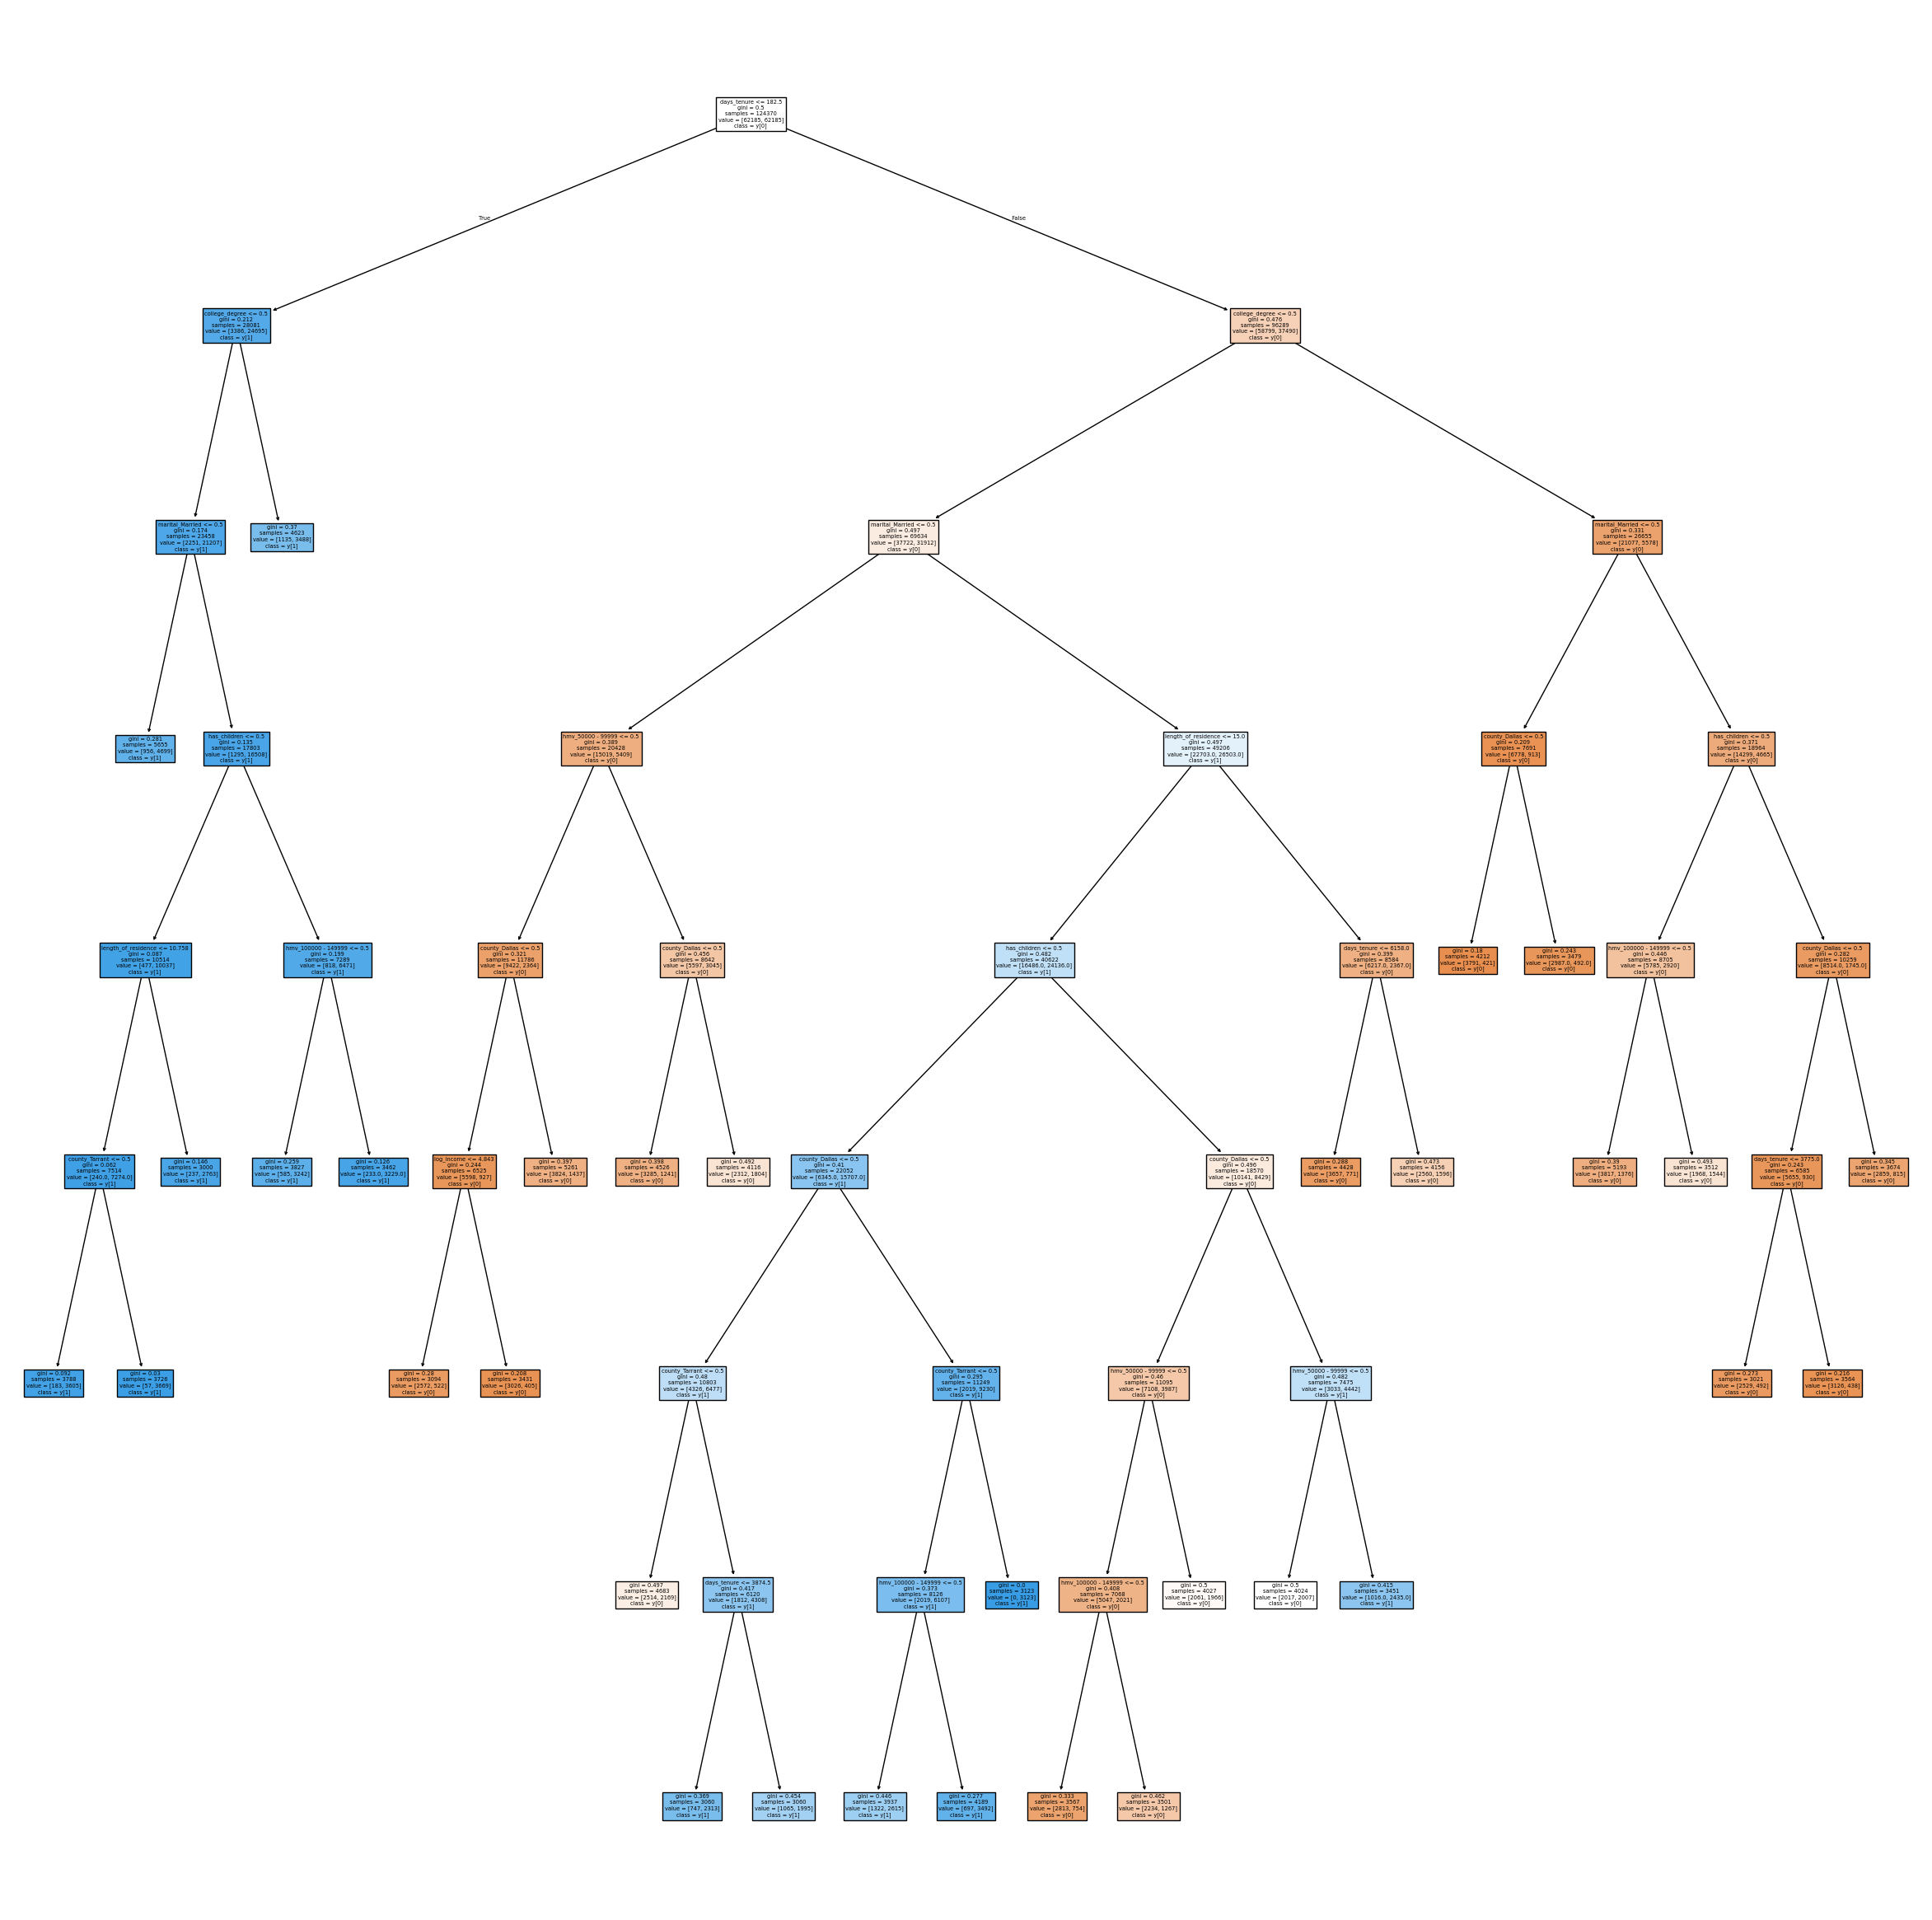

In [ ]:
feature_names = X_train_resampled.columns
plt.figure(figsize=(30, 30))
plot_tree(dt, filled=True, feature_names=feature_names, class_names=True)
plt.show()

### Feature Importance

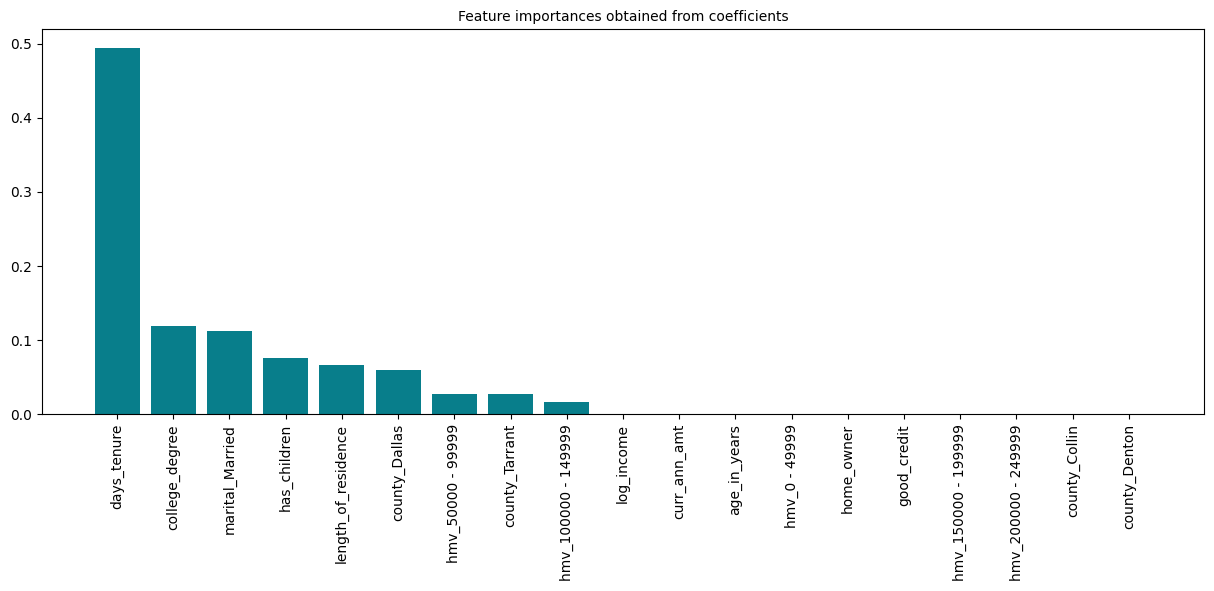

In [ ]:
# Plotting the importance plot
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': dt.feature_importances_
})

importances = importances.sort_values(by='Importance', ascending=False)
importances

plt.figure(figsize=(15,5))

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=10)
plt.xticks(rotation='vertical')
plt.show()

Observations:

* According to the Decision Tree and Feature Impotance chart above, days_tenure is the most important feature, indicating that the newer customers are at higher risk of churning.
* Other important features include having a college degree, marital status, whether the customer has children, length of residence at the current address, whether the customer resides in Dallas County, home market value in the range of 50,000–99,999 USD, residence in Tarrant County, and home market value in the range of 100,000–149,999 USD.

## Logistic Regression

              precision    recall  f1-score   support

           0       0.93      0.60      0.73     62185
           1       0.17      0.64      0.27      8039

    accuracy                           0.60     70224
   macro avg       0.55      0.62      0.50     70224
weighted avg       0.84      0.60      0.67     70224



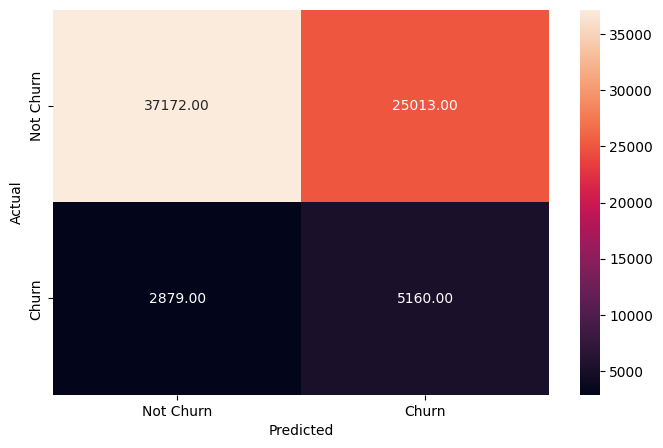

              precision    recall  f1-score   support

           0       0.93      0.60      0.73     15547
           1       0.17      0.66      0.28      2010

    accuracy                           0.60     17557
   macro avg       0.55      0.63      0.50     17557
weighted avg       0.84      0.60      0.67     17557



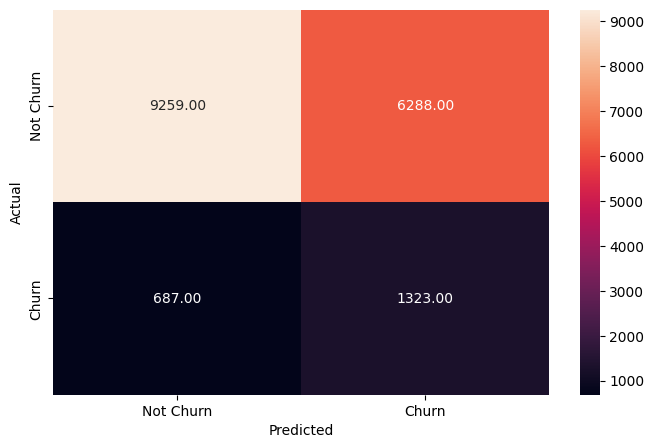

5-Fold CV Accuracy: 0.603 ± 0.001
5-Fold F1-Score: 0.271 ± 0.003


In [ ]:
# Logistic regression

# Sklearn applies regularization on Logistic Regression by default.
lr = LogisticRegression(random_state=1, class_weight="balanced", solver="newton-cg")

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

#checking performance on train dataset
y_train_pred_lr=lr.predict(X_train)
metrics_score(y_train,y_train_pred_lr)

#checking model performace of lr
y_pred_test_lr = lr.predict(X_test)
metrics_score(y_test, y_pred_test_lr)


acc_score = cross_val_score(lr, X_scaled, y, cv=5, scoring='accuracy')
print("5-Fold CV Accuracy: %.3f ± %.3f" % (acc_score.mean(), acc_score.std()))
f1_score_ = cross_val_score(lr, X_scaled, y, cv=5, scoring='f1')
print("5-Fold F1-Score: %.3f ± %.3f" % (f1_score_.mean(), f1_score_.std()))


**Observations from Logistic Regression:**
- The model achieved 60% overall accuracy, indicating moderate overall prediction strength.
- Churner recall is 66%, meaning it captures most churners effectively.
- Churner precision is 17%, so many customers predicted as churners are actually not.
- The model favors finding churners but misclassifies a large number of customers.




## Coefficients of Logistic regression

In [ ]:
# Printing the coefficients of Logistic Regression
cols=X.columns

coef_lr=lr.coef_

pd.DataFrame(coef_lr,columns=cols).T.sort_values(by=0,ascending=False)

,0
hmv_0 - 49999,0.094240
hmv_50000 - 99999,0.083954
hmv_100000 - 149999,0.072225
hmv_200000 - 249999,0.063715
has_children,0.041358
hmv_150000 - 199999,0.019796
marital_Married,0.018247
good_credit,0.011167
age_in_years,0.003438
curr_ann_amt,0.000243


**Observations:**

**Features with strong positive effect on customer churn:**
- hmv_0 - 49999

- hmv_50000 - 99999

- hmv_100000 - 149999

- hmv_200000 - 249999

- has_children

- hmv_150000 - 199999

- marital_Married

- good_credit

- age_in_years

- curr_ann_amt

**Features with strong negative effect on customer churn:**
- days_tenure

- length_of_residence

- county_Denton

- home_owner

- college_degree

- log_income

- county_Collin

- county_Dallas

- county_Tarrant

In [ ]:
# Calculating odds since coefficients are hard to understand as direct impact made
odds = np.exp(lr.coef_[0]) # Finding the odds

# adding the odds to a dataframe and sorting the values
pd.DataFrame(odds, X_train.columns, columns=['odds']).sort_values(by='odds', ascending=False)

,odds
hmv_0 - 49999,1.098824
hmv_50000 - 99999,1.087579
hmv_100000 - 149999,1.074897
hmv_200000 - 249999,1.065789
has_children,1.042225
hmv_150000 - 199999,1.019994
marital_Married,1.018414
good_credit,1.011230
age_in_years,1.003444
curr_ann_amt,1.000243


**Observations:**
- home values between 0–49,999 are 1.09 times more likely to take action compared to customers with other home values.

- Customers with children are 1.04 times more likely to take action compared to those without children.

- Customers with home values between 150,000–199,999 are 1.02 times more likely to act compared to wealthier customers.

- Married customers are 1.02 times more likely to take action compared to single or other marital statuses.

- Customers with good credit are 1.01 times more likely to take action compared to those with poor credit.


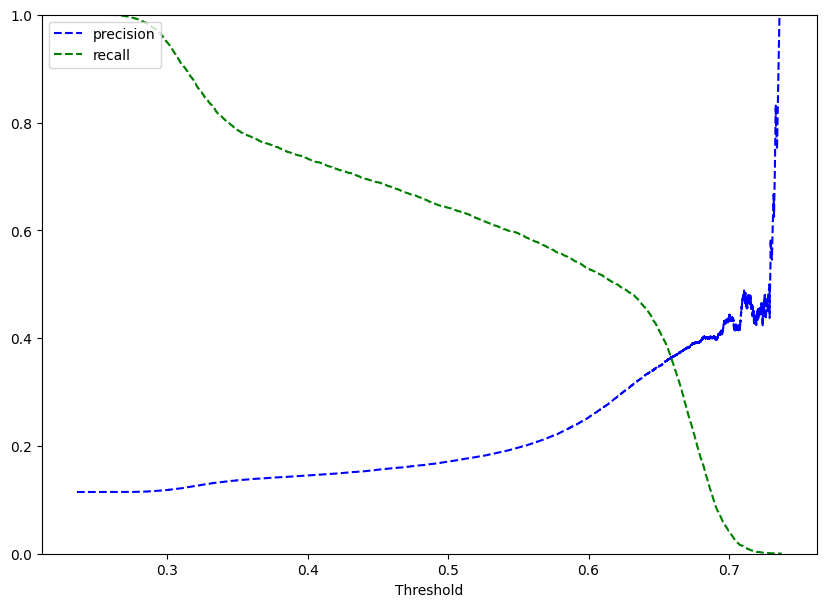

In [ ]:
y_scores_lr=lr.predict_proba(X_train) # predict_proba gives the probability of each observation belonging to each class

precisions_lr, recalls_lr, thresholds_lr = precision_recall_curve(y_train, y_scores_lr[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lr, precisions_lr[:-1], 'b--', label='precision')
plt.plot(thresholds_lr, recalls_lr[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

**Observation:**
- We can see that precision and recall are balanced for a threshold of about ~**0.66**.

**Let's find out the performance of the model at this threshold**

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     62185
           1       0.37      0.36      0.36      8039

    accuracy                           0.86     70224
   macro avg       0.64      0.64      0.64     70224
weighted avg       0.85      0.86      0.85     70224



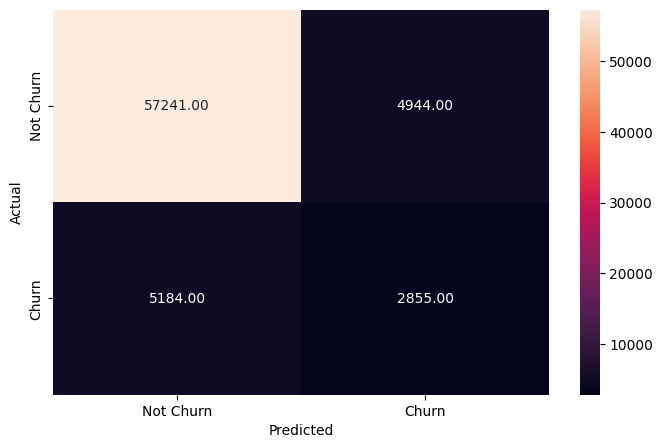

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     15547
           1       0.37      0.36      0.37      2010

    accuracy                           0.86     17557
   macro avg       0.64      0.64      0.64     17557
weighted avg       0.85      0.86      0.86     17557



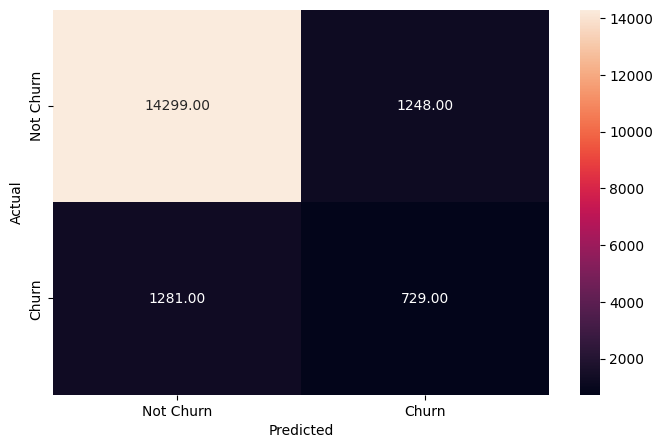

In [ ]:
optimal_threshold=0.66

# Checking performance on training data
y_pred_train_lr_optimal = lr.predict_proba(X_train)
metrics_score(y_train, y_pred_train_lr_optimal[:,1] > optimal_threshold)

# Checking performance on validation data
y_pred_test_lr_optimal = lr.predict_proba(X_test)
metrics_score(y_test, y_pred_test_lr_optimal[:,1] > optimal_threshold)

## K-Nearest Neighbors (KNN)

In [ ]:
# knn = KNeighborsClassifier()

# We select the best value of k for which the error rate is the least in the validation data

train_error = []
test_error = []
knn_many_split = {}

error_df_knn = pd.DataFrame()
features = X.columns

# Loop over a few values of the k to determine the best k
for k in tqdm(range(1,10)):
    train_error = []
    test_error = []
    lista = []
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    for i in range(2): # Needed to be scaled down due to performance limitations
        # Different random splits and their average
        x_train_new, x_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size = 0.20)

        #Fitting knn on training data
        knn.fit(x_train_new[:1000], y_train_new[:1000]) #  Subset due to performance limitations
        #Calculating error on training and validation data
        train_error.append(1 - knn.score(x_train_new, y_train_new))
        test_error.append(1 - knn.score(x_val, y_val))
    lista.append(sum(train_error)/len(train_error))
    lista.append(sum(test_error)/len(test_error))
    knn_many_split[k] = lista

knn_many_split

  0%|          | 0/9 [00:00<?, ?it/s]

{1: [0.1791594724007191, 0.1823068707725169],
 2: [0.11919934495096035, 0.12410110359558563],
 3: [0.12794816568468642, 0.12495550017799928],
 4: [0.11763292333434205, 0.11573513705945176],
 5: [0.11982235354847892, 0.12306870772516909],
 6: [0.1166005090870254, 0.11601993592025633],
 7: [0.11901244237170477, 0.1229263082947668],
 8: [0.11613770270029727, 0.11505873976504094],
 9: [0.11798002812438813, 0.11972232111071557]}

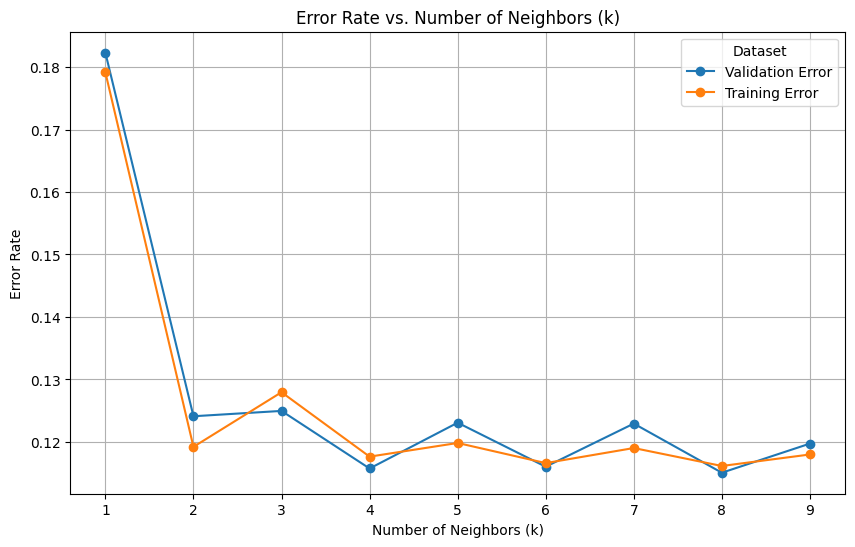

In [ ]:
# Initialize lists to store k values and corresponding error rates for validation and training
kltest = []  # For k values for validation error
vltest = []  # For validation error rates
kltrain = []  # For k values for training error
vltrain = []  # For training error rates

# Extract validation error rates for each k from the knn_many_split dictionary
for k, v in knn_many_split.items():
    kltest.append(k)  # Add the current k value
    vltest.append(knn_many_split[k][1])  # Add the validation error for the current k

# Extract training error rates for each k from the knn_many_split dictionary
for k, v in knn_many_split.items():
    kltrain.append(k)  # Add the current k value
    vltrain.append(knn_many_split[k][0])  # Add the training error for the current k

# Plotting k values vs. error rates for both training and validation datasets
plt.figure(figsize=(10, 6))
plt.plot(kltest, vltest, label='Validation Error', marker='o')
plt.plot(kltrain, vltrain, label='Training Error', marker='o')

plt.title('Error Rate vs. Number of Neighbors (k)')  # Set the title of the plot
plt.xlabel('Number of Neighbors (k)')  # Label for the x-axis, indicating different k values
plt.ylabel('Error Rate')  # Label for the y-axis, showing error rates

plt.grid(True)

plt.legend(title='Dataset')  # Display legend with a title for clarity

# Display the final plot
plt.show()


**Observations:**

- The validation/test error plateaus and stabilizes for K ≥ 5, indicating minimal improvement in model generalization beyond this point.

- Choosing K = 5 balances underfitting and overfitting risks: it achieves low training and validation errors while maintaining model robustness.

- A very small K (e.g., 1-2) risks capturing noise (overfitting), whereas excessively large K (e.g., >8) may underfit by ignoring local patterns.

- Conclusion: Optimal performance is achieved at K = 5. This value minimizes both training and validation errors and ensures the model generalizes well to unseen data.



              precision    recall  f1-score   support

           0       0.91      0.98      0.95     62185
           1       0.67      0.28      0.40      8039

    accuracy                           0.90     70224
   macro avg       0.79      0.63      0.67     70224
weighted avg       0.89      0.90      0.88     70224



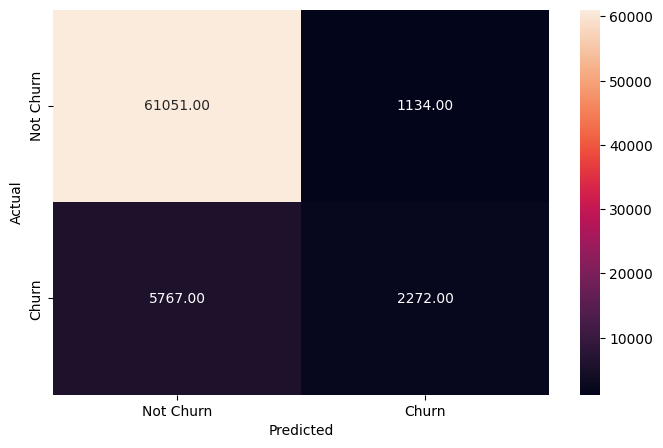

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     15547
           1       0.44      0.19      0.26      2010

    accuracy                           0.88     17557
   macro avg       0.67      0.58      0.60     17557
weighted avg       0.85      0.88      0.86     17557



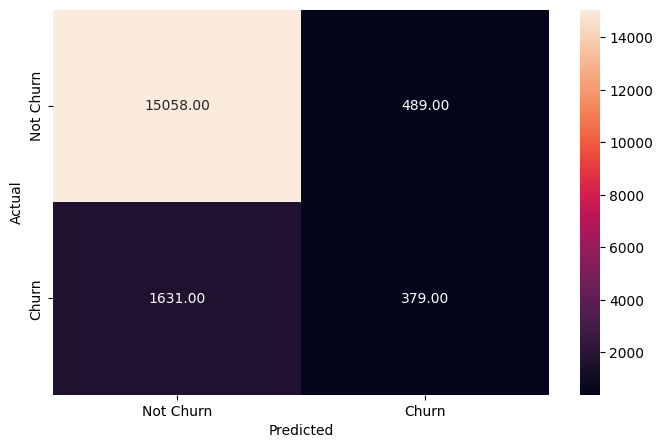

In [ ]:
# Define knn model
knn=KNeighborsClassifier(n_neighbors=5)

# Fitting data to the KNN model
knn.fit(X_train,y_train)

# Checking the performance of knn model on training data
y_pred_train_knn = knn.predict(X_train)
metrics_score(y_train, y_pred_train_knn)

# Checking the performance of knn model on testing data
y_pred_test_knn = knn.predict(X_test)
metrics_score(y_test, y_pred_test_knn)

**Observations:**
- Precision for Class 1 is 0.67, meaning two-thirds of positive predictions are correct.

- Recall for Class 1 is 0.28, showing that only 28% of true positive cases are being captured.

- F1-score for Class 1 is 0.40, indicating a modest balance but still leaving room for improvement in positive class prediction.

- The low recall suggests the model is missing a large number of actual positive cases, risking under-identification.


In [ ]:
# # Uncomment to run
# # Hyper parameter tuning

# from sklearn.model_selection import StratifiedKFold

# # Stratified Kfold to address class imbalance
# cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# params_knn={'n_neighbors':range(3,8),'weights':['uniform','distance'],'p':[1,2]}

# grid_knn=GridSearchCV(estimator=knn,param_grid=params_knn,scoring='f1',cv=cv)

# model_knn=grid_knn.fit(X_train,y_train) # Performance limitations - maybe take subset

# knn_estimator = model_knn.best_estimator_
# print(knn_estimator)

In [ ]:
# #Fit the best estimator on the training data
# knn_estimator.fit(X_train, y_train)

# y_pred_train_knn_estimator = knn_estimator.predict(X_train)
# metrics_score(y_train, y_pred_train_knn_estimator)

# y_pred_test_knn_estimator = knn_estimator.predict(X_test)
# metrics_score(y_test, y_pred_test_knn_estimator)

## Voting Classifier

A voting classifier is a technique in ensemble learning that combines the predictions from multiple individual models to improve the overall accuracy and robustness of the final prediction.

Here, we will build a Voting Classifier with the three models used above (Decision Tree, Logistic Regression, and K-Nearest Neighbor).

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     62185
           1       0.57      0.36      0.44      8039

    accuracy                           0.90     70224
   macro avg       0.75      0.66      0.69     70224
weighted avg       0.88      0.90      0.89     70224



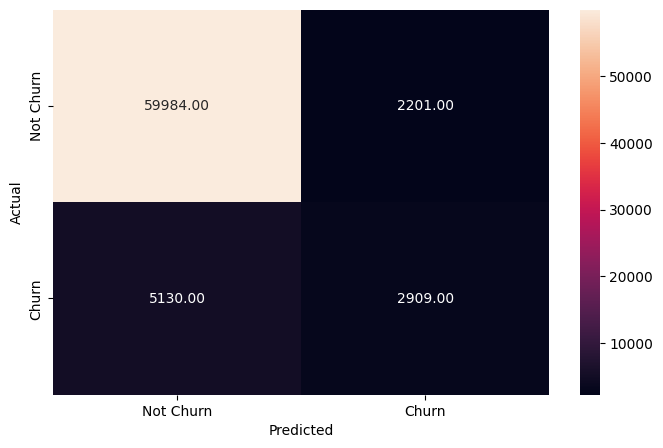

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     15547
           1       0.50      0.33      0.39      2010

    accuracy                           0.89     17557
   macro avg       0.71      0.64      0.67     17557
weighted avg       0.87      0.89      0.87     17557



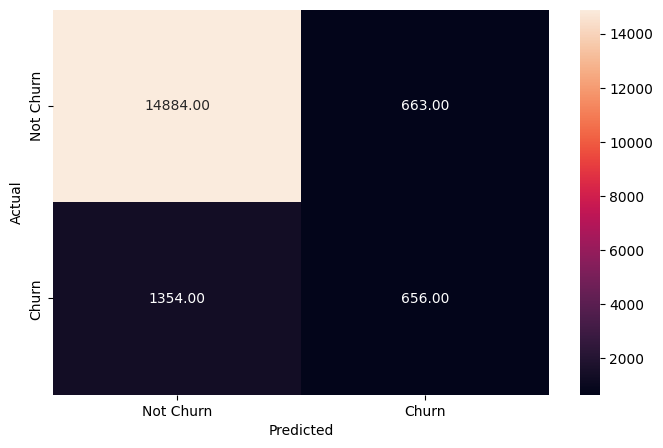

In [ ]:
voting_clf = VotingClassifier(estimators=[
    ('dt', dt), ('lr', lr), ('knn', knn)],
    voting='soft')

# Fit the voting classifier
voting_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = voting_clf.predict(X_test)

# Evaluate the performance
y_pred_train_voting_clf = voting_clf.predict(X_train)
metrics_score(y_train, y_pred_train_voting_clf)

y_pred_test_voting_clf = voting_clf.predict(X_test)
metrics_score(y_test, y_pred_test_voting_clf)

**Observations:**
- Precision for Class 1 is 0.50, meaning half of the positive predictions are correct.

- Recall for Class 1 is 0.33, capturing only one-third of the actual positive cases.

- F1-score for Class 1 is 0.39, reflecting a weaker balance between precision and recall.

- The low recall indicates the model is missing a significant portion of true positives.

## Comparing Model Performances

In [ ]:
def compare_model_performances(y_true, y_preds_dict):
  """
  Compares the performance of multiple classification models.

  Args:
    y_true: True labels of the dataset.
    y_preds_dict: A dictionary where keys are model names and values are
      predicted labels for each model.

  Returns:
    A pandas DataFrame with accuracy, precision, recall, and F1 score for
      each model.
  """

  results = []
  for model_name, y_pred in y_preds_dict.items():
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

  return pd.DataFrame(results)

In [ ]:
# Comparing model performances
y_preds_dict = {
    'Decision Tree': y_pred_test_dt,
    'Decision Tree (With SMOTE)': y_pred_test_dt_smote,
    'Logistic Regression': y_pred_test_lr,
    'Logistic Regression (Optimal)': y_pred_test_lr_optimal[:,1] > optimal_threshold,
    'K-Nearest Neighbors': y_pred_test_knn,
    'Voting Classifier': y_pred_test_voting_clf,
}

model_comparison_df = compare_model_performances(y_test, y_preds_dict)
model_comparison_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.887395,0.861450,0.887395,0.866034
1,Decision Tree (With SMOTE),0.822749,0.857123,0.822749,0.837325
2,Logistic Regression,0.602723,0.844251,0.602723,0.674720
3,Logistic Regression (Optimal),0.855955,0.854923,0.855955,0.855435
4,K-Nearest Neighbors,0.879250,0.848963,0.879250,0.857432
5,Voting Classifier,0.885117,0.868616,0.885117,0.874443


## Conclusion and Recommendations

**Conclusions:**

   - We tried multiple classification models and successfully identified the key factors driving customer churn in the insurance company.
   - The final model (before the Voting Classifier(SMOTE))- **Decision Tree Classifier** - provides strong performance with a balance of accuracy and recall on both training and testing datasets. While there may be room for further tuning, this model is well-suited for predicting customer churn in the insurance company, enabling the team to identify customers effectively.

**Recommendations:**
  - We analyzed that customers with medium-to-high home values (\$50,000–$150,000) and those with children are more likely to churn. By understanding their needs, the company can design specific retention strategies, such as personalized offers or loyalty programs.
  - Customers with longer tenure (over 5 years) are less likely to churn. Therefore, the company should focus on engaging these customers with personalized retention initiatives, such as anniversary rewards or extended benefit.
  - Company should target customers with shorter tenures (under 1 year) with introductory offers, proactive customer support, and check-ins. These customers are more vulnerable to churn and could benefit from additional engagement strategies early on.
  - Since around 84% have good credit and 35% hold college degrees, strategies targeting educated and creditworthy individuals could be more effective. Tailored messaging or benefits could be developed for customers with lower education levels or weaker credit to reduce risk.
  - Our analysis showed that the larger proportion of customers in the lower-to-middle income range may be more price-sensitive. Thus, For customers in the lower income range, the company should offer low-cost or value-based insurance products to minimize the churn risk due to price dissatisfaction.
  - Since customers who has lived at their current residence for shorter period are more likely to churn, company should implement a system to identify customers who recently moved and proactively reach out with personalized messages or incentives that highlight the benefits of staying with the insurance company during a period of change.

  - With observed trend on age, younger and newer individuals (those with shorter tenure and lower age) may require different engagement strategies, onboarding programs, or financial incentives to prevent early drop-offs.
  - Although the dataset primarily covers the major cities of Texas as Dallas, Fort Worth, Arlington and Plano(~45%), applying further in-depth insights to broader regional trends could further strengthen customer retention efforts.
  

  - Since a high percentage of customers are homeowners, creating home-related benefits (e.g., discounts on home insurance or bundling offers) could be an effective strategy for boosting retention in this segment.

  ----------